## Imports

In [4]:
using ChaosTools
using DifferentialEquations
using Plots
using LinearAlgebra
using Plots.PlotMeasures
using LaTeXStrings
using StaticArrays
using DynamicalSystems

In [5]:
include("LyapunovSystems.jl")
include("HomogeneousSystem.jl")

Main.HomogeneousSystem

## Run routine

In [8]:
# Initial Iext_e
I0 = 4
# Final Iext_e
If = 12.5 
# Discretization
h = 0.1
# Create a vector with step h from 0 to tf (inclusive)
vectorIext_e = range(4.0, stop=If, step=h);

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6);

# Define the parameters as a dictionary
p = Float64[8,8,1,5,-5,-5,1,1,5,13,5,13,0,6,10];

# Initialize an array of SVectors, where each row is an SVector{6}
matrix = Vector{SVector{6, Float64}}(undef, length(vectorIext_e));

# $\epsilon=10$

In [215]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 10.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];


In [216]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

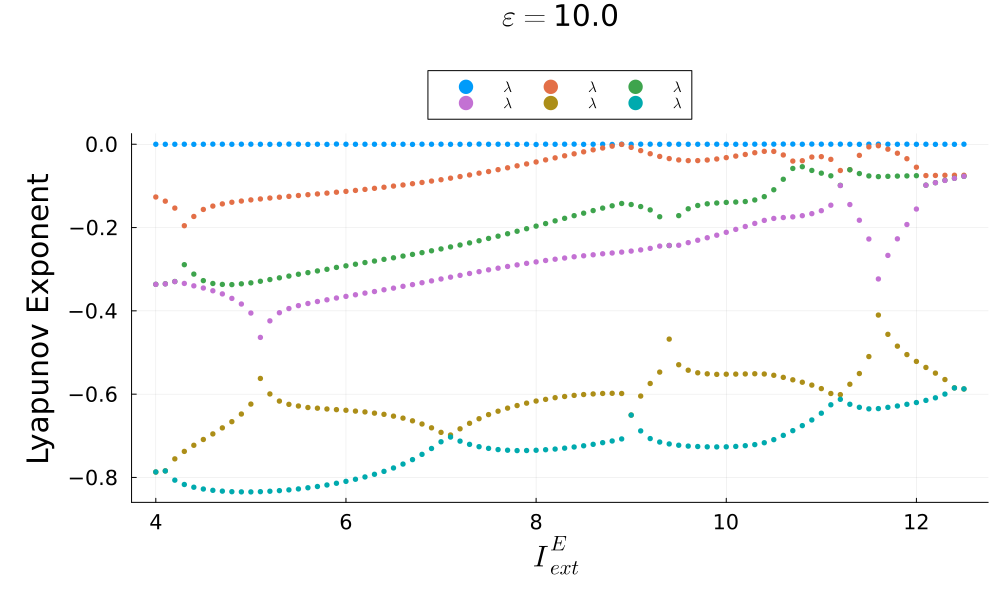

In [234]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label=L"\lambda",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=10,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 11$

In [235]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 11.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];

In [236]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

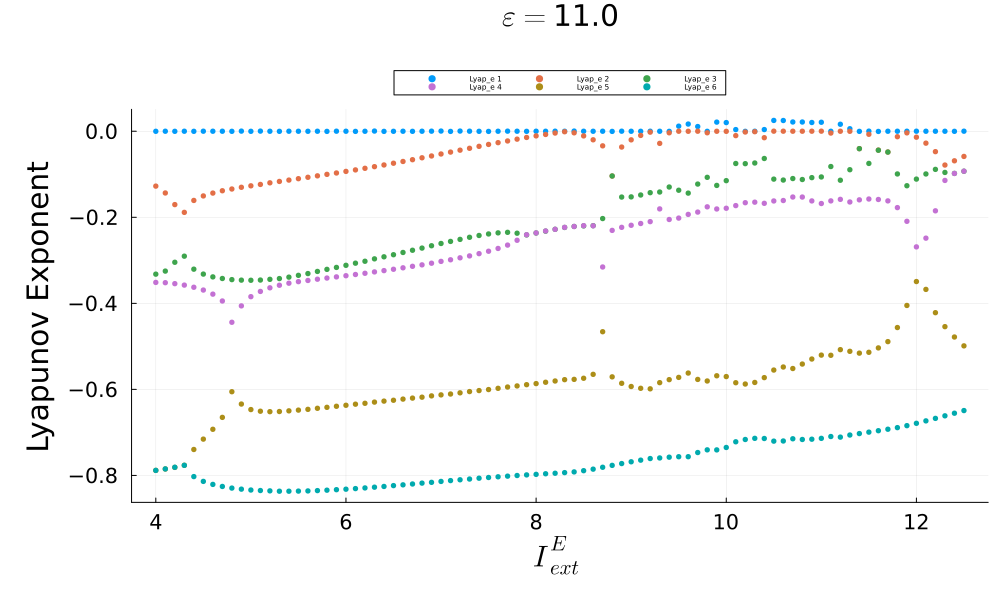

In [241]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 12$

In [14]:
# Initial Iext_e
I0 = 4
# Final Iext_e
If = 12.5
# Discretization
h = 0.01
# Create a vector with step h from 0 to tf (inclusive)
vectorIext_e = range(I0, stop=If, step=h);

# Initialize an array of SVectors, where each row is an SVector{6}
matrix = Vector{SVector{6, Float64}}(undef, length(vectorIext_e));

In [16]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 12.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];

In [17]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

Idx: 4.0
Idx: 4.01
Idx: 4.02
Idx: 4.03
Idx: 4.04
Idx: 4.05
Idx: 4.06
Idx: 4.07
Idx: 4.08
Idx: 4.09
Idx: 4.1
Idx: 4.11
Idx: 4.12
Idx: 4.13
Idx: 4.14
Idx: 4.15
Idx: 4.16
Idx: 4.17
Idx: 4.18
Idx: 4.19
Idx: 4.2
Idx: 4.21
Idx: 4.22
Idx: 4.23
Idx: 4.24
Idx: 4.25
Idx: 4.26
Idx: 4.27
Idx: 4.28
Idx: 4.29
Idx: 4.3
Idx: 4.31
Idx: 4.32
Idx: 4.33
Idx: 4.34
Idx: 4.35
Idx: 4.36
Idx: 4.37
Idx: 4.38
Idx: 4.39
Idx: 4.4
Idx: 4.41
Idx: 4.42
Idx: 4.43
Idx: 4.44
Idx: 4.45
Idx: 4.46
Idx: 4.47
Idx: 4.48
Idx: 4.49
Idx: 4.5
Idx: 4.51
Idx: 4.52
Idx: 4.53
Idx: 4.54
Idx: 4.55
Idx: 4.56
Idx: 4.57
Idx: 4.58
Idx: 4.59
Idx: 4.6
Idx: 4.61
Idx: 4.62
Idx: 4.63
Idx: 4.64
Idx: 4.65
Idx: 4.66
Idx: 4.67
Idx: 4.68
Idx: 4.69
Idx: 4.7
Idx: 4.71
Idx: 4.72
Idx: 4.73
Idx: 4.74
Idx: 4.75
Idx: 4.76
Idx: 4.77
Idx: 4.78
Idx: 4.79
Idx: 4.8
Idx: 4.81
Idx: 4.82
Idx: 4.83
Idx: 4.84
Idx: 4.85
Idx: 4.86
Idx: 4.87
Idx: 4.88
Idx: 4.89
Idx: 4.9
Idx: 4.91
Idx: 4.92
Idx: 4.93
Idx: 4.94
Idx: 4.95
Idx: 4.96
Idx: 4.97
Idx: 4.98
Idx: 4.99
Idx: 5.0
I

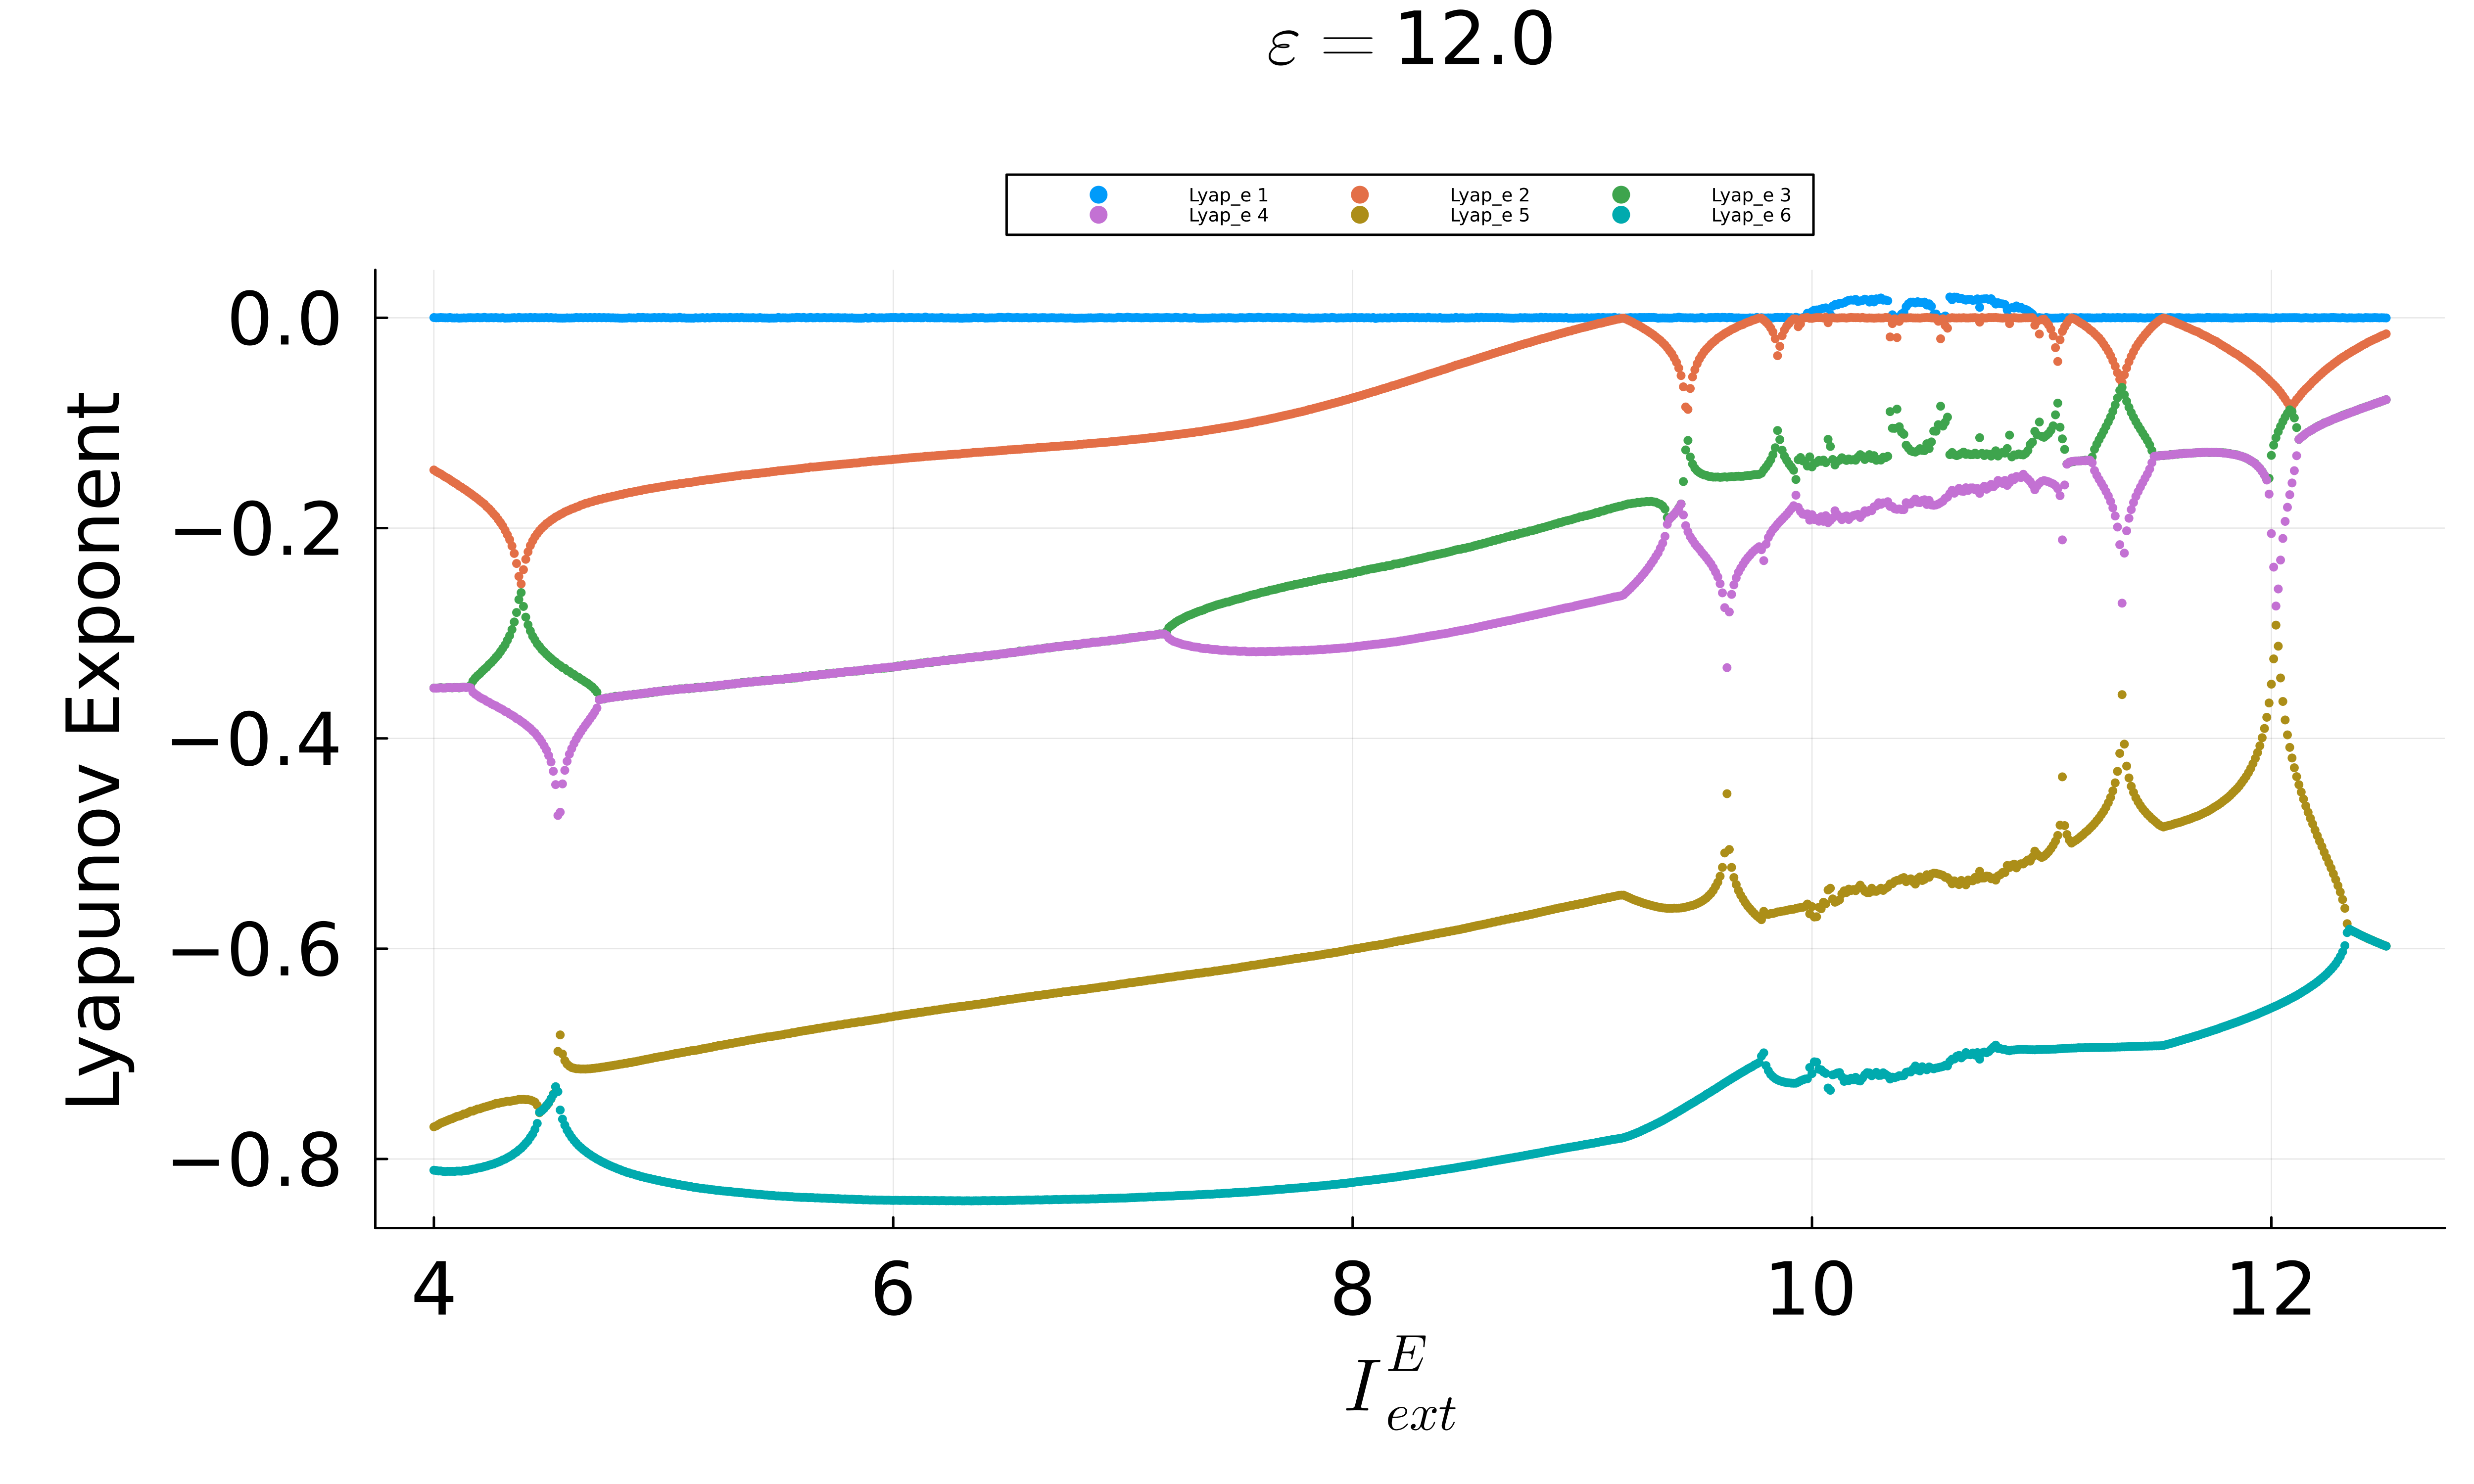

In [24]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=2,markerstrokewidth=0,dpi=500)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=20,ytickfont=20)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/FilledLyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 13$

In [245]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 13.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];

In [246]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

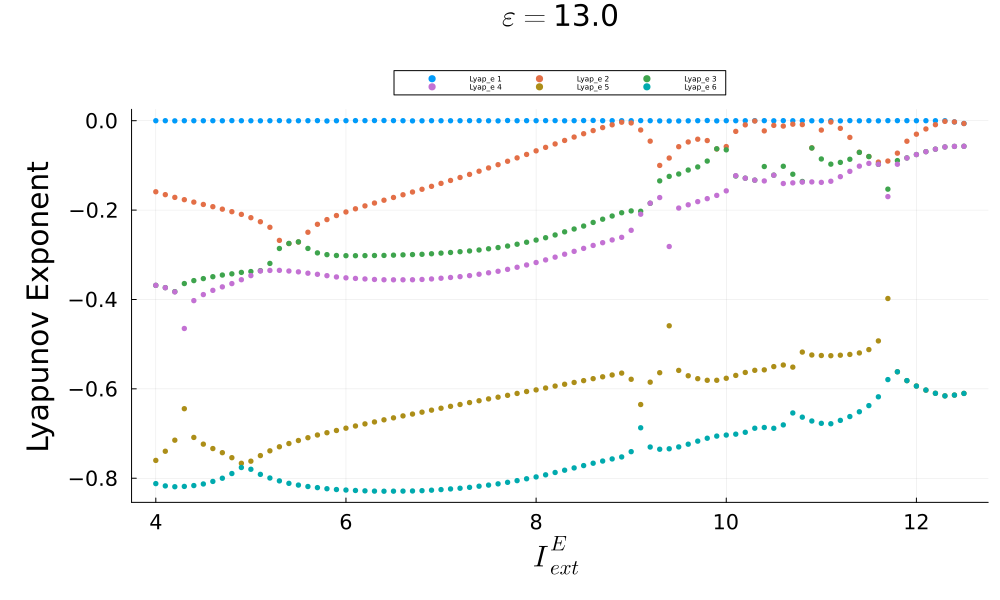

In [249]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

# $\epsilon = 14$

In [9]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 14.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];

In [ ]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

Idx: 4.0
Idx: 4.1
Idx: 4.2
Idx: 4.3
Idx: 4.4
Idx: 4.5
Idx: 4.6
Idx: 4.7
Idx: 4.8
Idx: 4.9
Idx: 5.0
Idx: 5.1
Idx: 5.2
Idx: 5.3
Idx: 5.4
Idx: 5.5
Idx: 5.6
Idx: 5.7
Idx: 5.8
Idx: 5.9
Idx: 6.0
Idx: 6.1
Idx: 6.2
Idx: 6.3
Idx: 6.4
Idx: 6.5
Idx: 6.6
Idx: 6.7
Idx: 6.8
Idx: 6.9
Idx: 7.0
Idx: 7.1
Idx: 7.2
Idx: 7.3
Idx: 7.4
Idx: 7.5
Idx: 7.6
Idx: 7.7
Idx: 7.8
Idx: 7.9
Idx: 8.0
Idx: 8.1
Idx: 8.2
Idx: 8.3
Idx: 8.4
Idx: 8.5
Idx: 8.6
Idx: 8.7
Idx: 8.8
Idx: 8.9
Idx: 9.0
Idx: 9.1
Idx: 9.2
Idx: 9.3
Idx: 9.4
Idx: 9.5
Idx: 9.6
Idx: 9.7
Idx: 9.8
Idx: 9.9
Idx: 10.0
Idx: 10.1
Idx: 10.2
Idx: 10.3
Idx: 10.4
Idx: 10.5
Idx: 10.6
Idx: 10.7
Idx: 10.8
Idx: 10.9
Idx: 11.0
Idx: 11.1
Idx: 11.2
Idx: 11.3
Idx: 11.4
Idx: 11.5
Idx: 11.6
Idx: 11.7
Idx: 11.8
Idx: 11.9
Idx: 12.0
Idx: 12.1
Idx: 12.2
Idx: 12.3
Idx: 12.4
Idx: 12.5


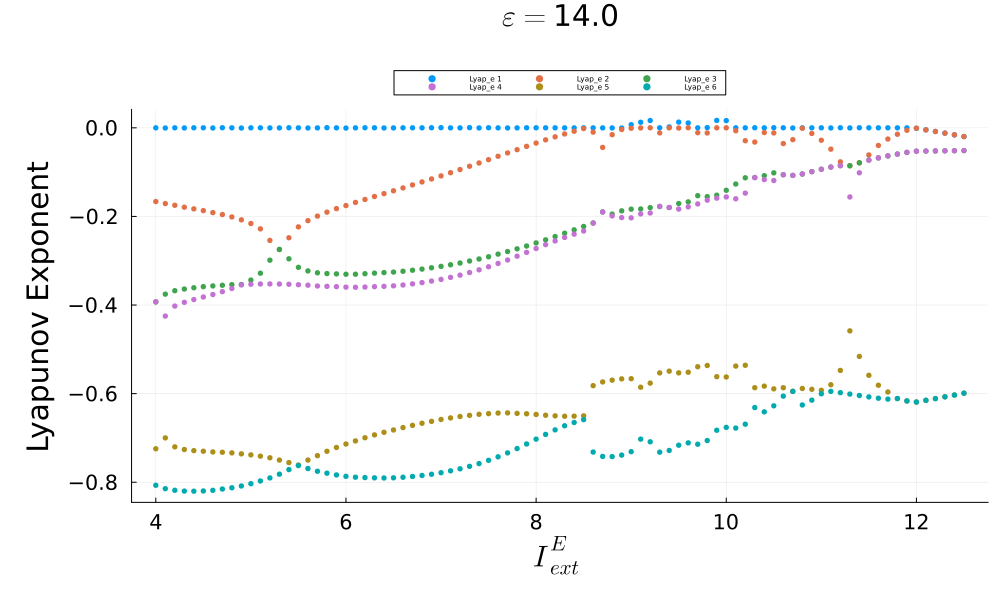

In [253]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 

## $\epsilon=15$

In [254]:
# Parameters for Lyapunov exp function
dt = 0.01
ns = 0.1
tmax = 1e4
trans = 8e2
Nsteps = Int(tmax/ns)

# Initial conditions (size should match the system, here we have a 2D system)
u0 = zeros(6)

eps = 15.0

# Define the parameters as a dictionary
p = [8.0,8.0,1.0,5.0,-5.0,-5.0,1.0,1.0,5.0,13.0,5.0,13.0,0.0,0.0,eps];

In [255]:
# Loop through the range 1:N to populate the matrix
for idx in 1:length(vectorIext_e)
    # Print current position
    current_I = vectorIext_e[idx]
    println("Idx: $current_I")

    # Update current Iext_e in parameters
    p[14] = current_I

    # Compute LyapunovExponents
    ds = ContinuousDynamicalSystem(HomogeneousSystem.HomogeneousSystem!, u0, p; diffeq=(alg=RK4(),dt=dt,adaptive=false))
    tands = TangentDynamicalSystem(ds; k=6,J=HomogeneousSystem.JacobianHomogeneous!)
    λ = lyapunovspectrum(tands, Nsteps; Δt = ns, Ttr=trans)

    # Store the SVector in the idx-th position of the matrix
    matrix[idx] = λ
end

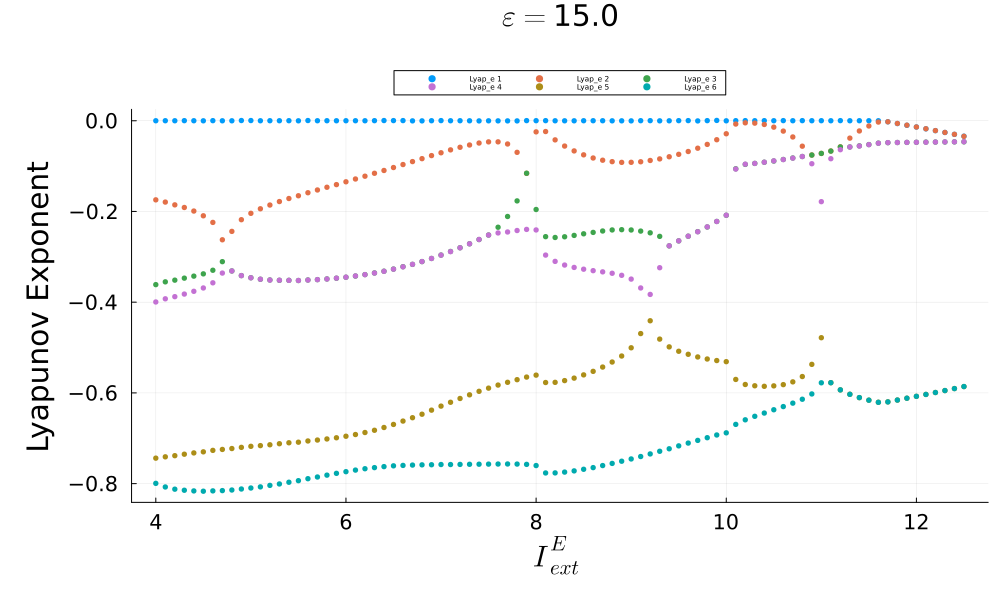

In [256]:
gr()  # Set the backend to GR
plot= scatter()
# Loop over each column and plot it in a different color
for i in 1:6
    scatter!(vectorIext_e,[matrix[j][i] for j in 1:length(vectorIext_e)], label="Lyap_e $i",markersize=3,markerstrokewidth=0)
end
# Set title
plot!(title=L"\epsilon = " * string(p[15]) ,titlefont = font(20),top_margin = 10mm)
# Set labels
xlabel!(L"I_{ext}^E",xguidefontsize=20,bottom_margin = 10mm)
ylabel!("Lyapunov Exponent",yguidefontsize=20,left_margin = 10mm)
plot!(xtickfont=14,ytickfont=14)
# Set the legend to have two columns
plot!(legend=:outertop, legendfontsize=5,legendcolumns=3)
# Set the figure size (make it wider)
plot!(size=(1000, 600)) 
savefig(plot,"Definitive/Lyapunov_eps = " * string(p[15])*".png")
display(plot) 